In [1]:
import pandas as pd
import MarineDNA as md
import plotly.express as px
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

### Import the data

In [5]:
file1 = "../../../Data/merged_data/no_duplicates/Merged2018_16S_otu_filtered.csv"
file2 = "../../../Data/merged_data/no_duplicates/Merged2018_18S_otu_filtered.csv"
asvs_16S = pd.read_csv(file1, index_col=0)
asvs_18S = pd.read_csv(file2, index_col=0)

### Perform one random draw

In [30]:
# one random draw
ran_lo_16S = md.ranRelPct(asvs_16S)
ran_lo_18S = md.ranRelPct(asvs_18S)
ran_lo_16S

ASV_1      ASV_2     ASV_3     ASV_4     ASV_5     ASV_6  \
CN18Fc43_5_eDNA  -3.169818  -1.961567 -3.369255 -7.395034 -5.169085 -4.393982   
CN18FESPkoa_SC58 -3.080905  -2.025360 -3.570158 -6.679888 -5.039884 -4.218189   
CN18FESPkoa_SC43 -3.189242  -1.814922 -3.292499 -6.724346 -4.994134 -4.093774   
CN18FESPkoa_SC40 -3.110904  -1.881834 -3.207465 -6.996825 -4.926680 -4.209444   
CN18FESPkoa_SC37 -3.151407  -2.234205 -3.670586 -7.407719 -4.969837 -4.312011   
...                    ...        ...       ...       ...       ...       ...   
Lasker18Sc145_19 -6.577989 -11.496172 -6.467372 -2.689370 -3.915218 -5.431564   
Lasker18Sc145_3  -1.392270  -6.672091 -3.148189 -5.268721 -5.882298 -3.855127   
Lasker18Sc145_5  -1.425479  -6.587007 -3.038267 -5.330344 -6.023340 -4.050894   
Lasker18Sc150_17 -6.200213 -10.735191 -4.610099 -1.599153 -2.818278 -3.800424   
Lasker18Sc135_17 -7.757133 -11.290006 -7.487443 -2.313180 -4.073782 -5.795097   

                     ASV_7      ASV_8      ASV_9    ASV_10  ...   ASV_8120  \
CN18Fc43_5_eDNA  -5.751752  -4.383203  -3.395090 -4.033898  ... -12.078474   
CN18FESPkoa_SC58 -5.832048  -4.496393  -2.866001 -4.182250  ... -13.068170   
CN18FESPkoa_SC43 -5.566924  -4.477470  -2.992492 -4.208996  ... -11.688774   
CN18FESPkoa_SC40 -5.633832  -4.271802  -3.259714 -4.198777  ... -10.826225   
CN18FESPkoa_SC37 -5.762164  -4.788178  -3.036038 -4.230746  ... -12.024526   
...                    ...        ...        ...       ...  ...        ...   
Lasker18Sc145_19 -3.555478  -5.810401 -13.328510 -6.795457  ... -11.727893   
Lasker18Sc145_3  -6.618202  -3.591226  -8.244256 -4.930550  ... -13.478198   
Lasker18Sc145_5  -6.164004  -3.595526 -10.714970 -4.801997  ... -10.119035   
Lasker18Sc150_17 -2.202126  -5.135440  -8.110958 -5.453539  ... -11.641088   
Lasker18Sc135_17 -4.816460 -10.756819 -10.846596 -7.304712  ... -11.489860   

                   ASV_8124   ASV_8125   ASV_8126   ASV_8127   ASV_8128  \
CN18Fc43_5_eDNA  -11.784728 -10.484238 -11.625570 -13.180393 -14.210084   
CN18FESPkoa_SC58 -11.034817 -11.294377 -12.940121 -10.264660 -10.268947   
CN18FESPkoa_SC43 -13.480795 -10.008893 -12.238054 -12.427957 -15.562129   
CN18FESPkoa_SC40 -14.266285 -11.717478 -11.365037 -11.926741 -13.534977   
CN18FESPkoa_SC37 -10.355083 -10.959013 -11.103025 -10.848621 -10.053480   
...                     ...        ...        ...        ...        ...   
Lasker18Sc145_19 -12.821717 -11.257594 -10.107197 -12.553607  -9.613969   
Lasker18Sc145_3   -9.963191 -12.683778 -12.064023  -9.823448 -10.118457   
Lasker18Sc145_5  -11.695162 -11.373439  -9.220017 -11.815287 -11.568569   
Lasker18Sc150_17 -11.580718 -10.443401  -9.995758 -11.314186 -11.361340   
Lasker18Sc135_17 -10.904683 -11.854610  -9.236791  -9.702146 -13.361619   

                   ASV_8129   ASV_8130   ASV_8132   ASV_8133  
CN18Fc43_5_eDNA  -10.976347 -11.324520 -10.014050 -15.022701  
CN18FESPkoa_SC58 -10.705796 -11.560627 -12.906465 -12.994659  
CN18FESPkoa_SC43 -14.149645 -10.958249 -10.728883 -12.148149  
CN18FESPkoa_SC40  -9.756780 -11.695409 -11.324712 -12.108603  
CN18FESPkoa_SC37 -10.412699  -9.713627 -12.365237 -10.291648  
...                     ...        ...        ...        ...  
Lasker18Sc145_19 -12.232428 -11.859017 -11.489231 -12.168245  
Lasker18Sc145_3  -14.561878 -12.411200 -11.044974 -10.392857  
Lasker18Sc145_5  -10.197568 -12.001367 -12.185087 -11.496247  
Lasker18Sc150_17 -10.709200 -10.941114 -12.113795 -10.271928  
Lasker18Sc135_17 -13.296202 -11.877433 -10.766536 -15.782866  

[131 rows x 7077 columns]

### Hierarchical clustering of random log-odds draw

In [31]:
labels_16S = md.doClustering(ran_lo_16S, 4)
labels_18S = md.doClustering(ran_lo_18S, 4)
print(labels_16S)
print()
print(pd.DataFrame(np.array(np.unique(labels_16S, return_counts=True)).T))

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '3' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '3' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '2' '2' '0' '2' '0' '0' '0' '0' '0' '0' '1' '2'
 '0' '2' '0' '3' '0' '0' '0' '0' '2' '0' '2' '0' '0' '2' '2' '0' '0' '2'
 '2' '0' '0' '2' '2' '0' '0' '2' '2' '2' '0' '0' '2' '2' '0' '2' '0' '2'
 '0' '0' '2' '0' '0' '2' '0' '0' '2' '2' '0' '0' '2' '2' '0' '2' '0' '2'
 '0' '0' '2' '2' '0' '2' '0' '2' '2' '0' '0' '2' '2' '0' '0' '0' '2' '2'
 '2' '0' '0' '2' '2']

   0   1
0  0  47
1  1  41
2  2  40
3  3   3


### Perform PCAs

In [32]:
pca_results_16S = md.doPCA(ran_lo_16S)
pca_results_18S = md.doPCA(ran_lo_18S)
pca_results_16S["scores"]

array([[-57.08418929,   2.54773733,  16.06404707, ..., -10.28344059,
        -21.0217841 ,   1.28720368],
       [-57.64474059,  -3.12653216,  11.86674505, ..., -21.52909645,
         22.4966196 ,  -7.23838871],
       [-57.28701797,   3.1004437 ,  10.65461374, ...,  15.52391427,
         -0.31712445,  -3.5972809 ],
       ...,
       [ 33.64463942,  18.81950201,  11.53172176, ...,  -7.69930894,
         -0.06604275, -12.05840706],
       [  2.92906693, -29.05280406, -46.18242563, ...,  -1.55679209,
          2.88327817,   5.84502909],
       [ 34.1950762 , -35.76597206,  -2.25730205, ...,  10.44085814,
         -8.33626371,  -3.7341151 ]])

### Visualizing PCAs

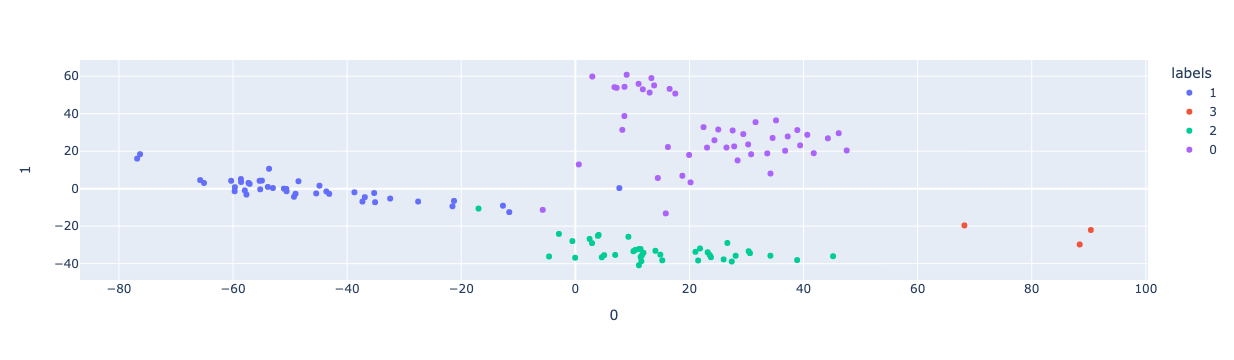

In [33]:
# 16S
scores_16S = pd.DataFrame(md.doPCA(ran_lo_16S)["scores"])
scores_16S["labels"] = labels_16S
fig_16S = px.scatter(
    scores_16S,
    x = 0,
    y = 1,
    color = "labels"
)
fig_16S.show()

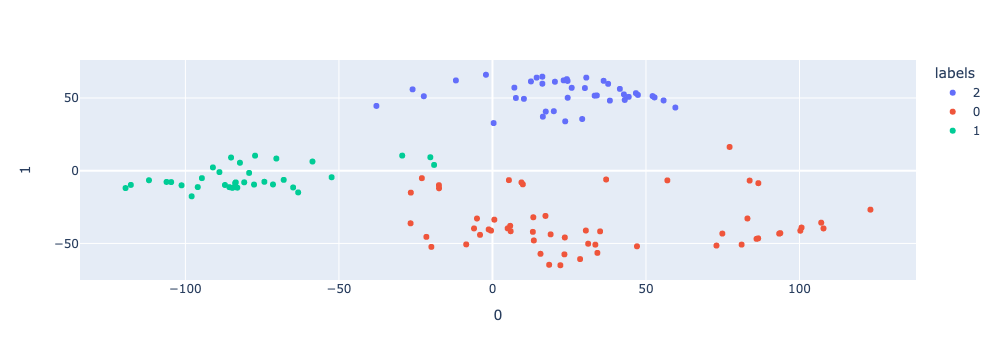

In [11]:
# 18S
scores_18S = pd.DataFrame(md.doPCA(ran_lo_18S)["scores"])
scores_18S["labels"] = labels_18S
fig_18S = px.scatter(
    scores_18S,
    x = 0,
    y = 1,
    color = "labels"
)
fig_18S.show()

### Cluster samples based on n_rep random draws and n_clust clusters

In [12]:
# 16S
n_clust = 8
n_rep = 10
 
cluster_samples_16S = [md.doClustering(md.ranRelPct(asvs_16S), n_clust) for i in range(n_rep)]
cluster_samples_16S = pd.DataFrame(cluster_samples_16S).transpose()
cluster_samples_16S

0  1  2  3  4  5  6  7  8  9
0    1  1  1  1  1  1  1  1  1  1
1    1  1  1  1  1  1  1  1  1  1
2    1  1  1  1  1  1  1  1  1  1
3    1  1  1  1  1  1  1  1  1  1
4    1  1  1  1  1  1  1  1  1  1
..  .. .. .. .. .. .. .. .. .. ..
126  5  5  5  5  5  6  2  5  6  5
127  0  0  0  0  0  0  0  0  0  0
128  0  0  0  0  0  0  0  0  0  0
129  3  3  3  3  3  5  3  3  5  3
130  5  5  5  5  5  6  2  5  6  5

[131 rows x 10 columns]

In [13]:
# 18S
n_clust = 8
n_rep = 10
 
cluster_samples_18S = [md.doClustering(md.ranRelPct(asvs_18S), n_clust) for i in range(n_rep)]
cluster_samples_18S = pd.DataFrame(cluster_samples_18S).transpose()
cluster_samples_18S

0  1  2  3  4  5  6  7  8  9
0    0  7  7  7  7  7  7  7  7  0
1    0  3  3  3  3  3  3  3  3  0
2    0  3  3  3  3  3  3  3  3  0
3    0  3  3  3  3  3  3  3  3  0
4    0  3  3  3  3  3  3  3  3  0
..  .. .. .. .. .. .. .. .. .. ..
126  1  1  1  1  1  1  0  1  1  1
127  2  2  2  2  2  2  2  2  2  2
128  2  2  2  2  2  2  2  2  2  2
129  1  1  1  1  1  1  0  1  1  1
130  3  5  5  5  5  5  6  5  5  3

[131 rows x 10 columns]

### A function to test if row pws[0] is the same cluster as row pws[1] in column 'col'

In [14]:
def isSameCluster(pws, df, col):
    return df.iloc[pws[0], col] == df.iloc[pws[1], col]

print(isSameCluster((1, 3), cluster_samples_16S, 0))
print(isSameCluster((0, 3), cluster_samples_16S, 0))

True
True


### Code to test if each pair of rows ((n^2 - 1)/2) = 1891) are the same for all columns

In [15]:
import itertools

In [16]:
# 16S
pws_rows_16S = itertools.combinations(range(cluster_samples_16S.shape[0]), 2)

pws_same_16S = pd.DataFrame([[isSameCluster(pair, cluster_samples_16S, col) for col in range(cluster_samples_16S.shape[1])] for pair in pws_rows_16S])
pws_same_16S

0      1      2      3      4      5      6      7      8      9
0      True   True   True   True   True   True   True   True   True   True
1      True   True   True   True   True   True   True   True   True   True
2      True   True   True   True   True   True   True   True   True   True
3      True   True   True   True   True   True   True   True   True   True
4      True   True   True   True   True   True   True   True   True   True
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...
8510  False  False  False  False  False  False  False  False  False  False
8511  False  False  False  False  False  False  False  False  False  False
8512  False  False  False  False  False  False  False  False  False  False
8513  False  False  False  False  False  False  False  False  False  False
8514  False  False  False  False  False  False  False  False  False  False

[8515 rows x 10 columns]

In [17]:
# 18S
pws_rows_18S = itertools.combinations(range(cluster_samples_18S.shape[0]), 2)

pws_same_18S = pd.DataFrame([[isSameCluster(pair, cluster_samples_18S, col) for col in range(cluster_samples_18S.shape[1])] for pair in pws_rows_18S])
pws_same_18S

0      1      2      3      4      5      6      7      8      9
0      True  False  False  False  False  False  False  False  False   True
1      True  False  False  False  False  False  False  False  False   True
2      True  False  False  False  False  False  False  False  False   True
3      True  False  False  False  False  False  False  False  False   True
4      True  False  False  False  False  False  False  False  False   True
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...
8510  False  False  False  False  False  False  False  False  False  False
8511  False  False  False  False  False  False  False  False  False  False
8512  False  False  False  False  False  False  False  False  False  False
8513  False  False  False  False  False  False  False  False  False  False
8514  False  False  False  False  False  False  False  False  False  False

[8515 rows x 10 columns]

In [18]:
# Function to return maximum number of values that are the same in a each row
def maxSame(row):
    return row.value_counts().max()

print(maxSame(pws_same_16S.iloc[0, :]))
print(maxSame(pws_same_16S.iloc[1890, :]))

10
10


## Code to return the percent of all values that were the same by row

In [20]:
# 16S
num_same_16S = [maxSame(pws_same_16S.iloc[row, :]) for row in range(pws_same_16S.shape[0])]
np.sum(num_same_16S) * 100 / (pws_same_16S.shape[0] * pws_same_16S.shape[1])

99.83206106870229

In [21]:
# 18S
num_same_18S = [maxSame(pws_same_18S.iloc[row, :]) for row in range(pws_same_18S.shape[0])]
np.sum(num_same_18S) * 100 / (pws_same_18S.shape[0] * pws_same_18S.shape[1])

98.36406341749853

## Putting it all together

In [22]:
# Function to create n_rep draws of df and assign n_clusters and returns percent of draws that had same relative cluster assignments
# This would be a good section to speed up with GPUs (or in another way!)

def pctSame(df, n_clust, n_rep):
    if n_clust >= df.shape[0]:
        return 100
    
    def isSameCluster(pws, df, col):
        return df.iloc[pws[0], col] == df.iloc[pws[1], col]
    
    def maxSame(row):
        return row.value_counts().max()
    
    # cluster a random sample of logit(relative percentages)
    cluster_samples = [md.doClustering(md.ranRelPct(df), n_clust) for i in range(n_rep)]
    cluster_samples = pd.DataFrame(cluster_samples).transpose()
    # unique pairs of rows
    pws_rows = itertools.combinations(range(cluster_samples.shape[0]), 2)
    # identify pairs of samples that are in the same cluster (True) or in different clusters (False)
    pws_same = pd.DataFrame([[isSameCluster(pair, cluster_samples, col) for col in range(cluster_samples.shape[1])] for pair in pws_rows])
    # get the maximum number replicates that have the same value (True or False) for each sample
    num_same = [maxSame(pws_same.iloc[row, :]) for row in range(pws_same.shape[0])]
    # convert to percentage with maximum of same value across all replicates
    return np.sum(num_same) * 100 / (pws_same.shape[0] * pws_same.shape[1])

In [23]:
%%time
# Code to return pct of draws that had the same relative cluster assignment for 2 to 62 clusters for n_rep replicates
# NB: This takes a long time to run for a modest number of replicates!!

n_rep = 50
num_clust_16S = np.arange(2, asvs_16S.shape[1] + 1)
pct_same_16S = [pctSame(asvs_16S, x, n_rep) for x in num_clust_16S]

CPU times: user 39min 16s, sys: 1.22 s, total: 39min 17s
Wall time: 39min 16s


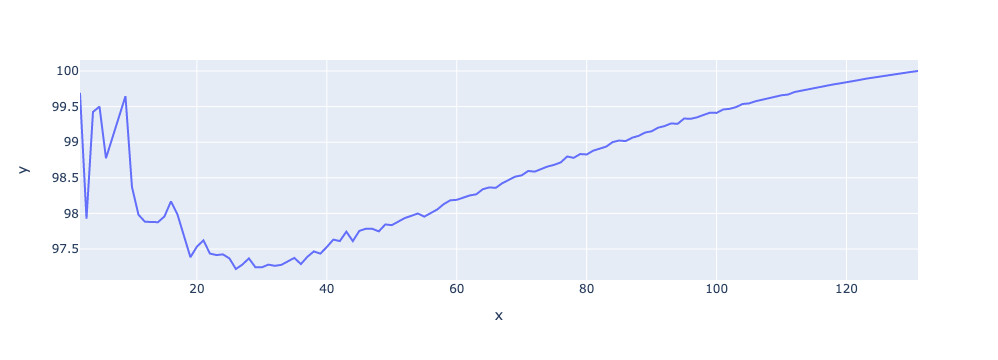

In [24]:
# Plot percent of draws the same for each number of clusters
px.line(x = num_clust_16S, y = pct_same_16S)

In [34]:
%%time
# Code to return pct of draws that had the same relative cluster assignment for 2 to 62 clusters for n_rep replicates
# NB: This takes a long time to run for a modest number of replicates!!

n_rep = 50
num_clust_18S = np.arange(2, asvs_18S.shape[1] + 1)
pct_same_18S = [pctSame(asvs_18S, x, n_rep) for x in num_clust_18S]

CPU times: user 45min 22s, sys: 784 ms, total: 45min 23s
Wall time: 45min 23s


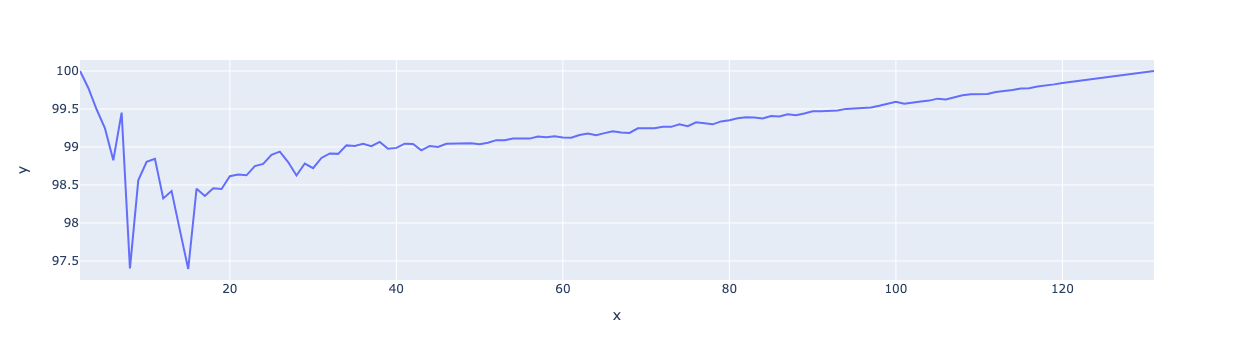

In [35]:
# Plot percent of draws the same for each number of clusters
px.line(x = num_clust_18S, y = pct_same_18S)

In [ ]:
# Plot percent of draws the same for each number of clusters
px.line(x = num_clust_16S, y = pct_same_16S)